In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
%matplotlib inline

titleFontSize=18
axisLabelFontSize=15
axisNumFontSize=13

conn=sqlite3.connect('DCA.db')
cur=conn.cursor()

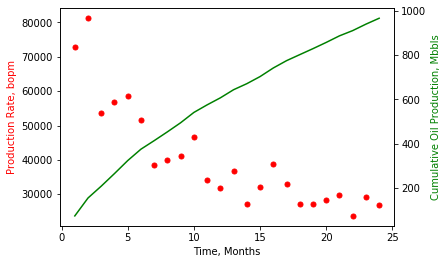

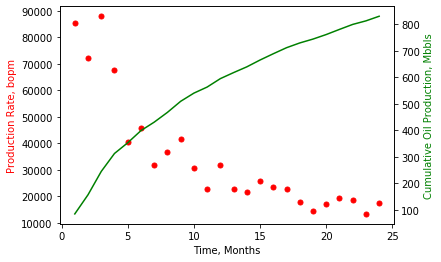

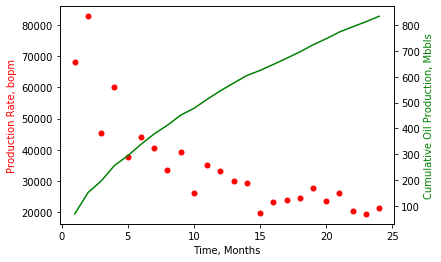

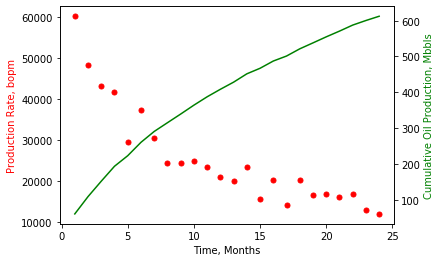

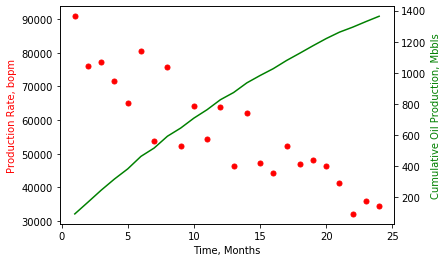

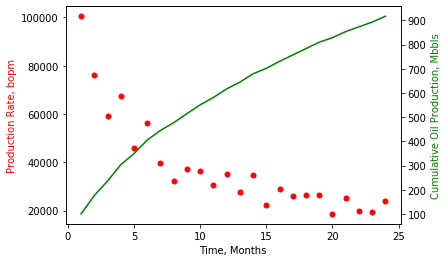

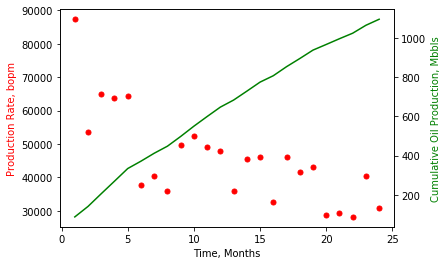

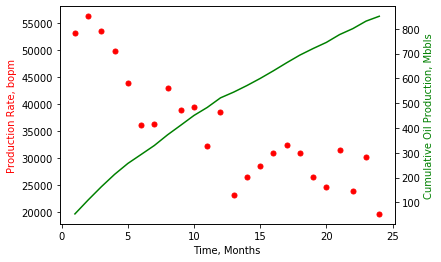

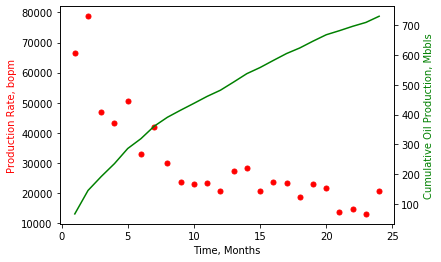

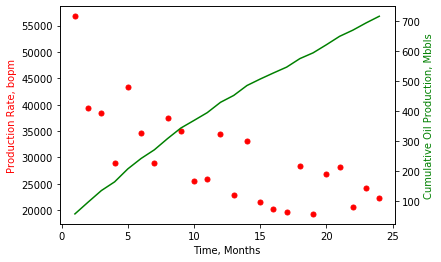

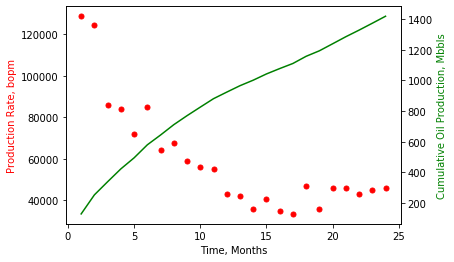

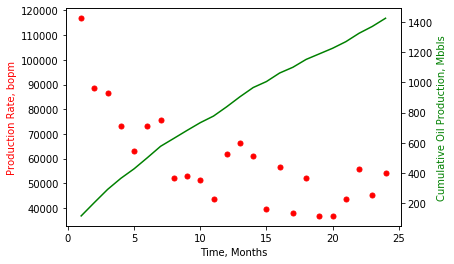

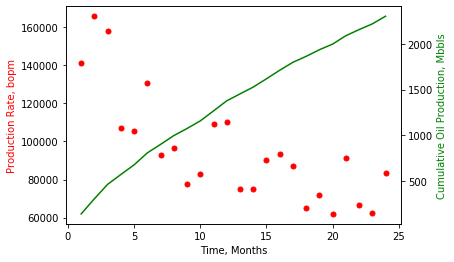

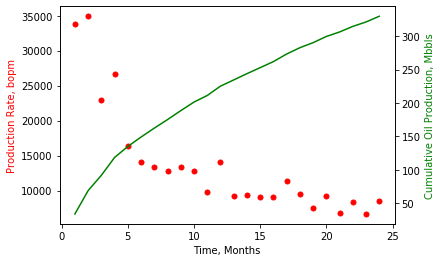

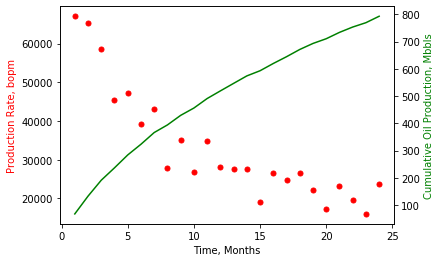

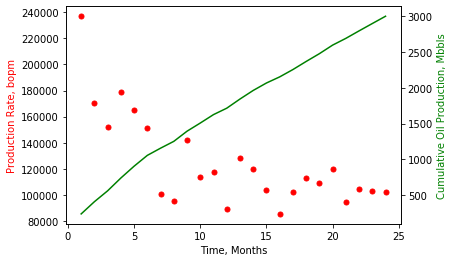

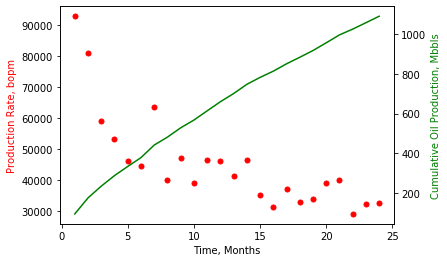

In [2]:
#Problem 1
for wellID in range(1,18):
    prodDF=pd.read_sql_query(f"SELECT time,rate, Cum,Cum_model FROM Rates WHERE wellID={wellID};",conn)
    dcaDF=(f"SELECT *FROM DCAparams;",conn)
    fig,ax1=plt.subplots()
    ax2=ax1.twinx()
    ax1.plot(prodDF['time'],prodDF['rate'],color="red", ls='None',marker= 'o',markersize=5,)
    ax2.plot(prodDF['time'],prodDF['Cum']/1000,'g-')
    ax1.set_xlabel('Time, Months')
    ax1.set_ylabel('Production Rate, bopm', color='r')
    ax2.set_ylabel('Cumulative Oil Production, Mbbls', color='g')
    plt.show()

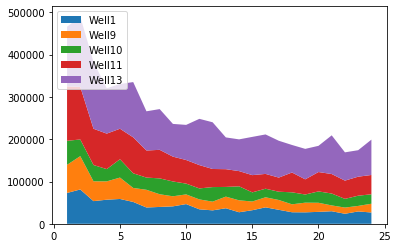

In [3]:
#Problem 2
for wellID in range(1,18):
    prodDF=pd.read_sql_query(f"SELECT time FROM Rates WHERE wellID={wellID};",conn)
    dcaDF=pd.read_sql_query(f"SELECT wellID FROM DCAparams WHERE fluid='gas';",conn)
a=1
for n in dcaDF['wellID']:
    prodDF['Well'+str(n)]=pd.read_sql_query(f"SELECT rate FROM Rates WHERE wellID={n};",conn)    
production=prodDF.iloc[:,1:].to_numpy()
time=prodDF['time'].to_numpy()
labels=prodDF.columns
labels=list(labels[1:])
fig,ax=plt.subplots()
ax.stackplot(time,np.transpose(production), labels=labels)
ax.legend(loc='upper left')
plt.show()

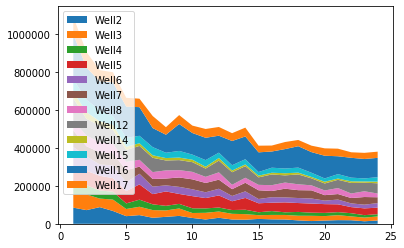

In [4]:
#Problem 3
for wellID in range(1,18):
    prodDF=pd.read_sql_query(f"SELECT time FROM Rates WHERE wellID={wellID};", conn)
    dcaDF=pd.read_sql_query(f"SELECT wellID FROM DCAparams WHERE fluid='oil';", conn)
a=1
for n in dcaDF['wellID']:
    prodDF['Well'+str(n)]=pd.read_sql_query(f"SELECT rate FROM Rates WHERE wellID={n};", conn )    
production=prodDF.iloc[:,1:].to_numpy()
time=prodDF['time'].to_numpy()
labels=prodDF.columns
labels=list(labels[1:])
fig,ax=plt.subplots()
ax.stackplot(prodDF['time'],np.transpose(production), labels=labels)
ax.legend(loc='upper left')
plt.show()

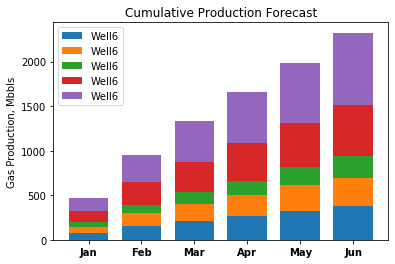

In [5]:
#Problem 4
N=6
ind=np.arange(1,N+1)    
months=['Jan','Feb','Mar','Apr','May','Jun']
result=np.zeros(len(months))
labels=[]
loc_plots=[]
width=.75
cumDF=pd.DataFrame(prodDF['time'])
dcaDF=pd.read_sql_query(f"SELECT wellID FROM DCAparams WHERE fluid = 'gas';", conn)
for b in dcaDF['wellID']:
    cumDF['Well'+ str(b)]=pd.read_sql_query(f"SELECT Cum FROM Rates WHERE wellID = {b};", conn)
a=1
for n in dcaDF['wellID']:
    p1=plt.bar(cumDF['time'][0:N],cumDF['Well'+ str(n)][0:N]/1000,width,bottom=result)
    labels.append('Well'+str(N))
    loc_plots.append(p1)
    plt.ylabel('Gas Production, Mbbls')
    plt.title('Cumulative Production Forecast')
    plt.xticks(ind, months, fontweight='bold') 
    a+=1
    split=cumDF.iloc[0:6, 1:a].values
    result=np.sum(a=split,axis=1)/1000
plt.legend(loc_plots, labels)
plt.show(loc_plots)

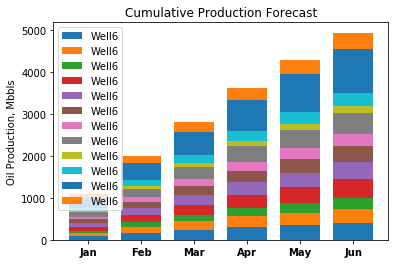

In [6]:
N=6
ind=np.arange(1,N+1)    
months=['Jan','Feb','Mar','Apr','May','Jun']
result=np.zeros(len(months))
labels=[]
loc_plots=[]
width=.75
cumDF=pd.DataFrame(prodDF['time'])
dcaDF=pd.read_sql_query(f"SELECT wellID FROM DCAparams WHERE fluid = 'oil';", conn)
for a in dcaDF['wellID']:
    cumDF['Well'+str(a)]=pd.read_sql_query(f"SELECT Cum FROM Rates WHERE wellID = {a};", conn)
    #cumDF = pd.read_sql_query(f"SELECT time FROM Rates WHERE wellID ={wellID};", conn)
    #dcaDF = pd.read_sql_query(f"SELECT wellID FROM DCAparams WHERE fluid ='gas';", conn)
a=1
for n in dcaDF['wellID']:
    p1 = plt.bar(cumDF['time'][0:N], cumDF['Well'+ str(n)][0:N]/1000, width, bottom = result)
    labels.append('Well'+ str(N))
    loc_plots.append(p1)
    plt.ylabel('Oil Production, Mbbls')
    plt.title('Cumulative Production Forecast')
    plt.xticks(ind, months, fontweight='bold')  
    a+=1
    split=cumDF.iloc[0:6, 1:a].values
    result=np.sum(a=split,axis=1)/1000
plt.legend(loc_plots, labels)
plt.show(loc_plots)

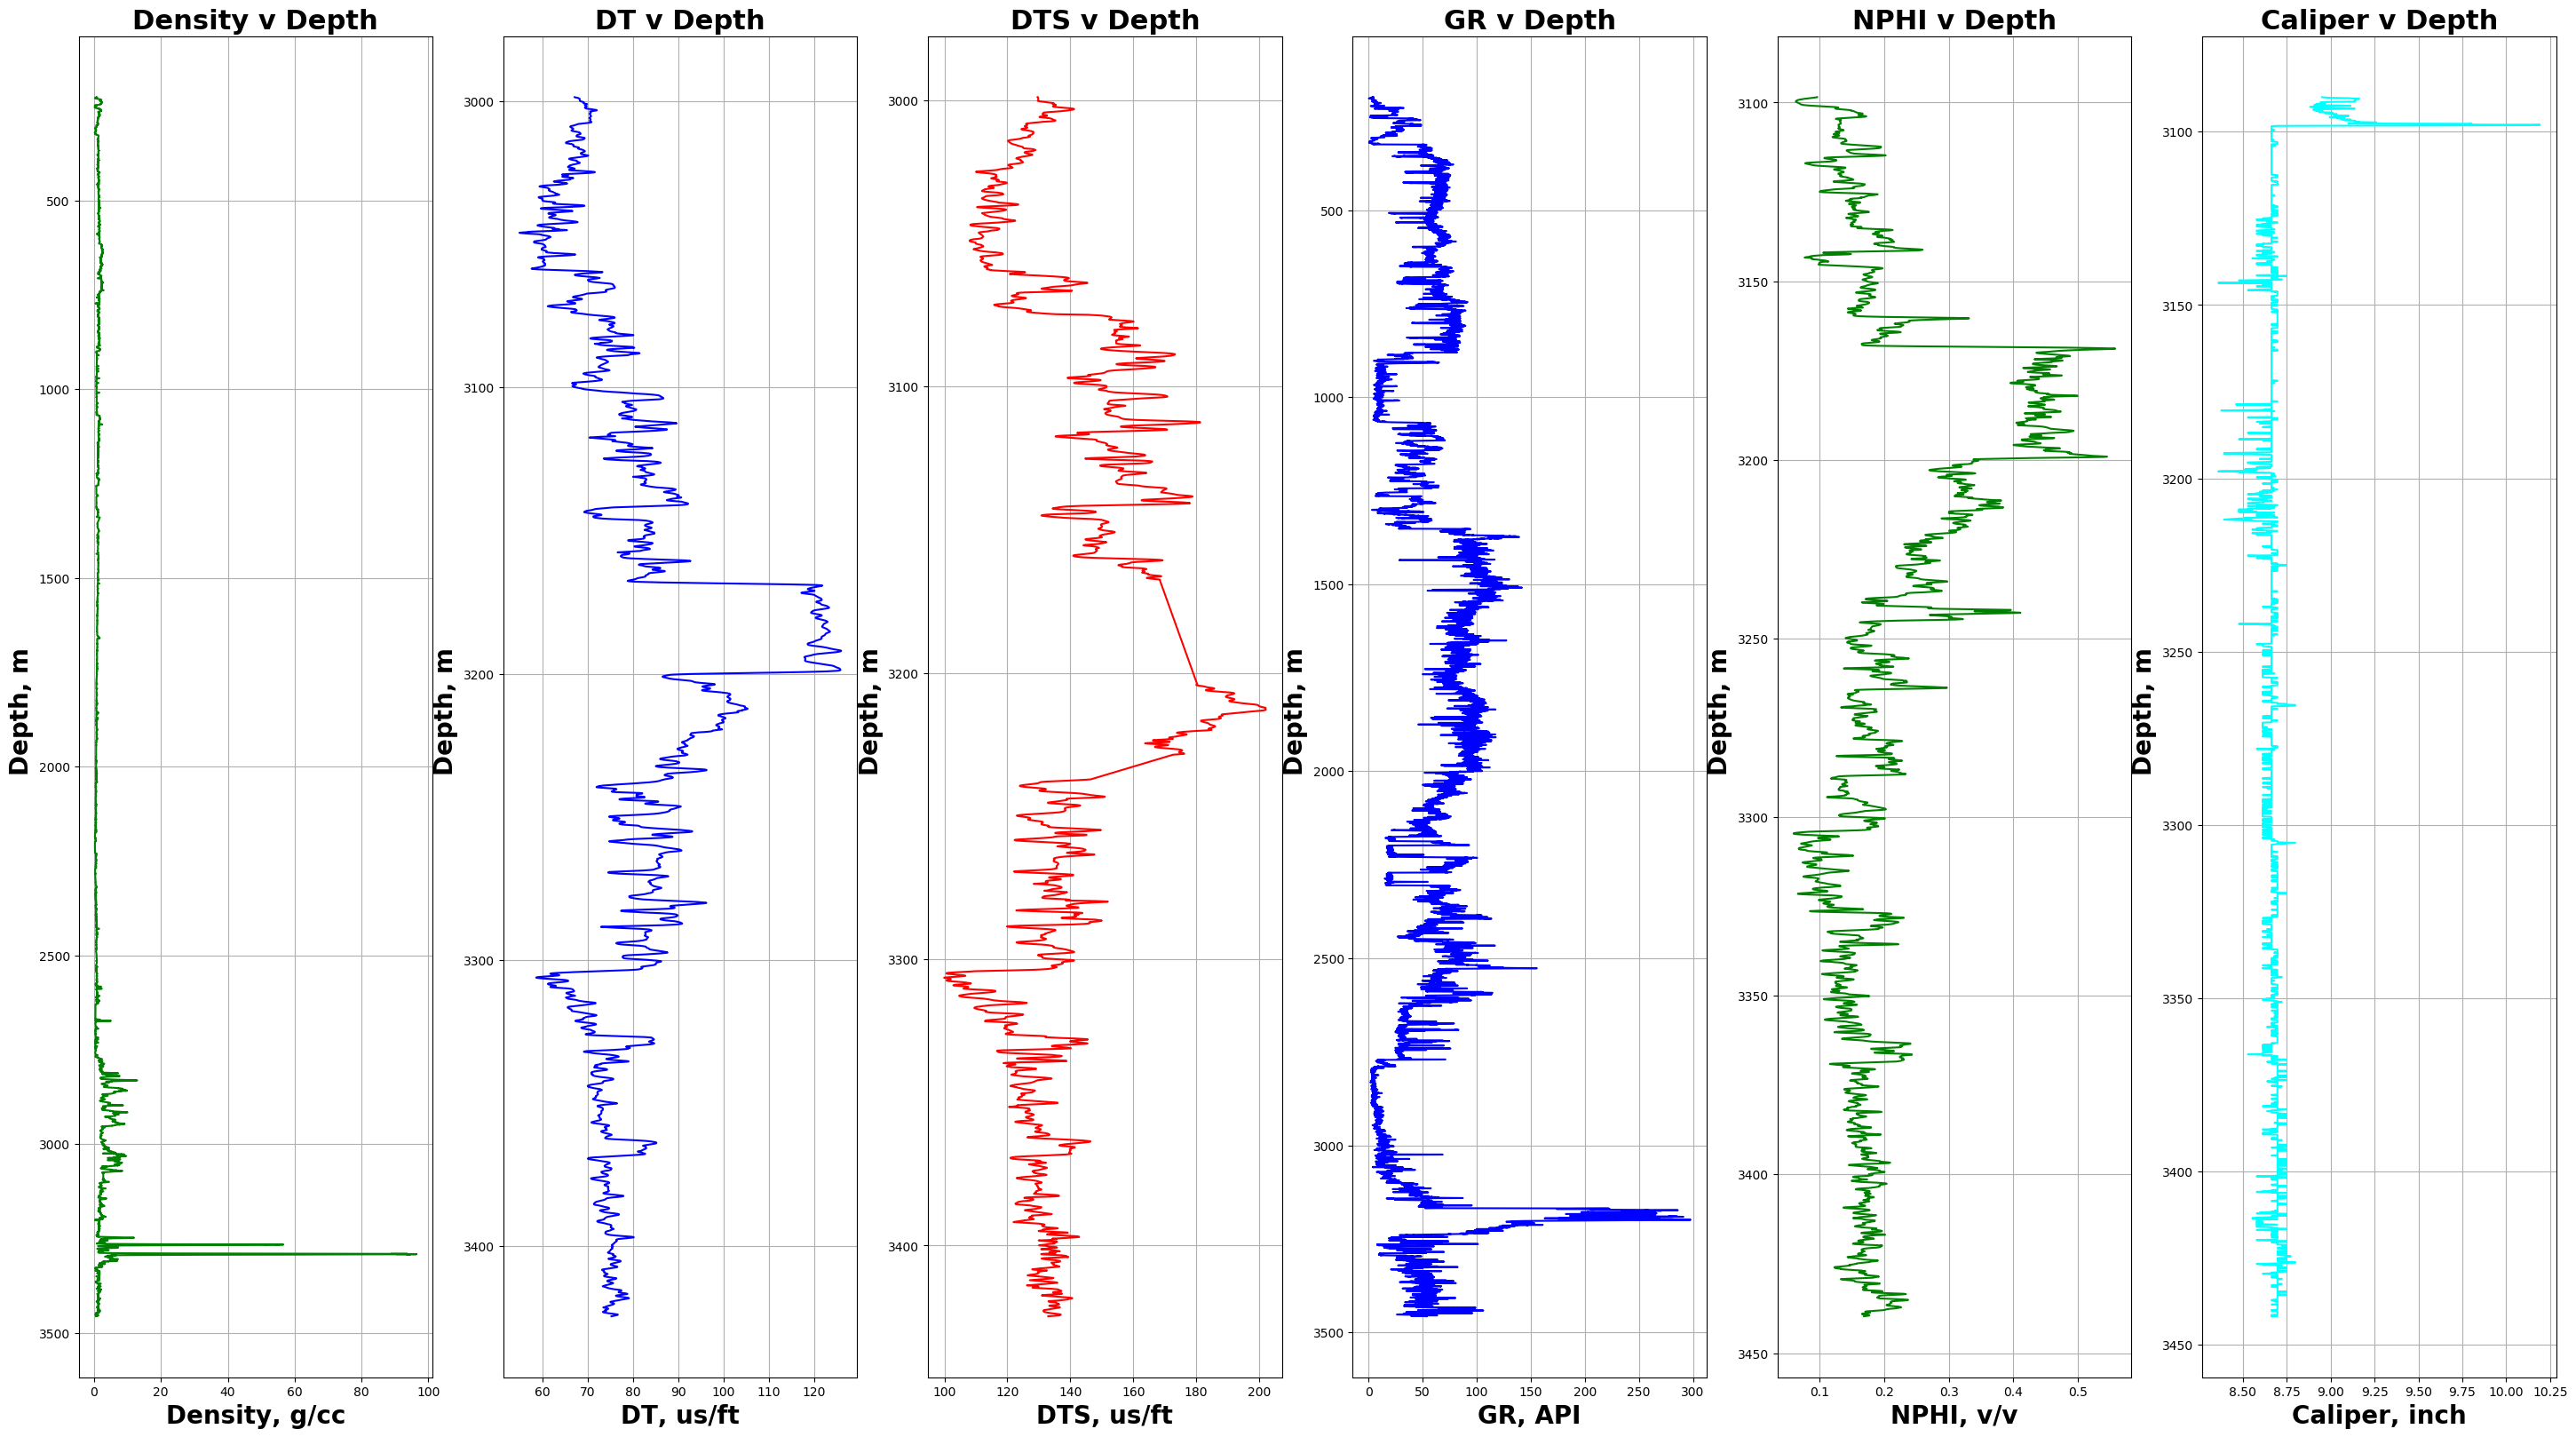

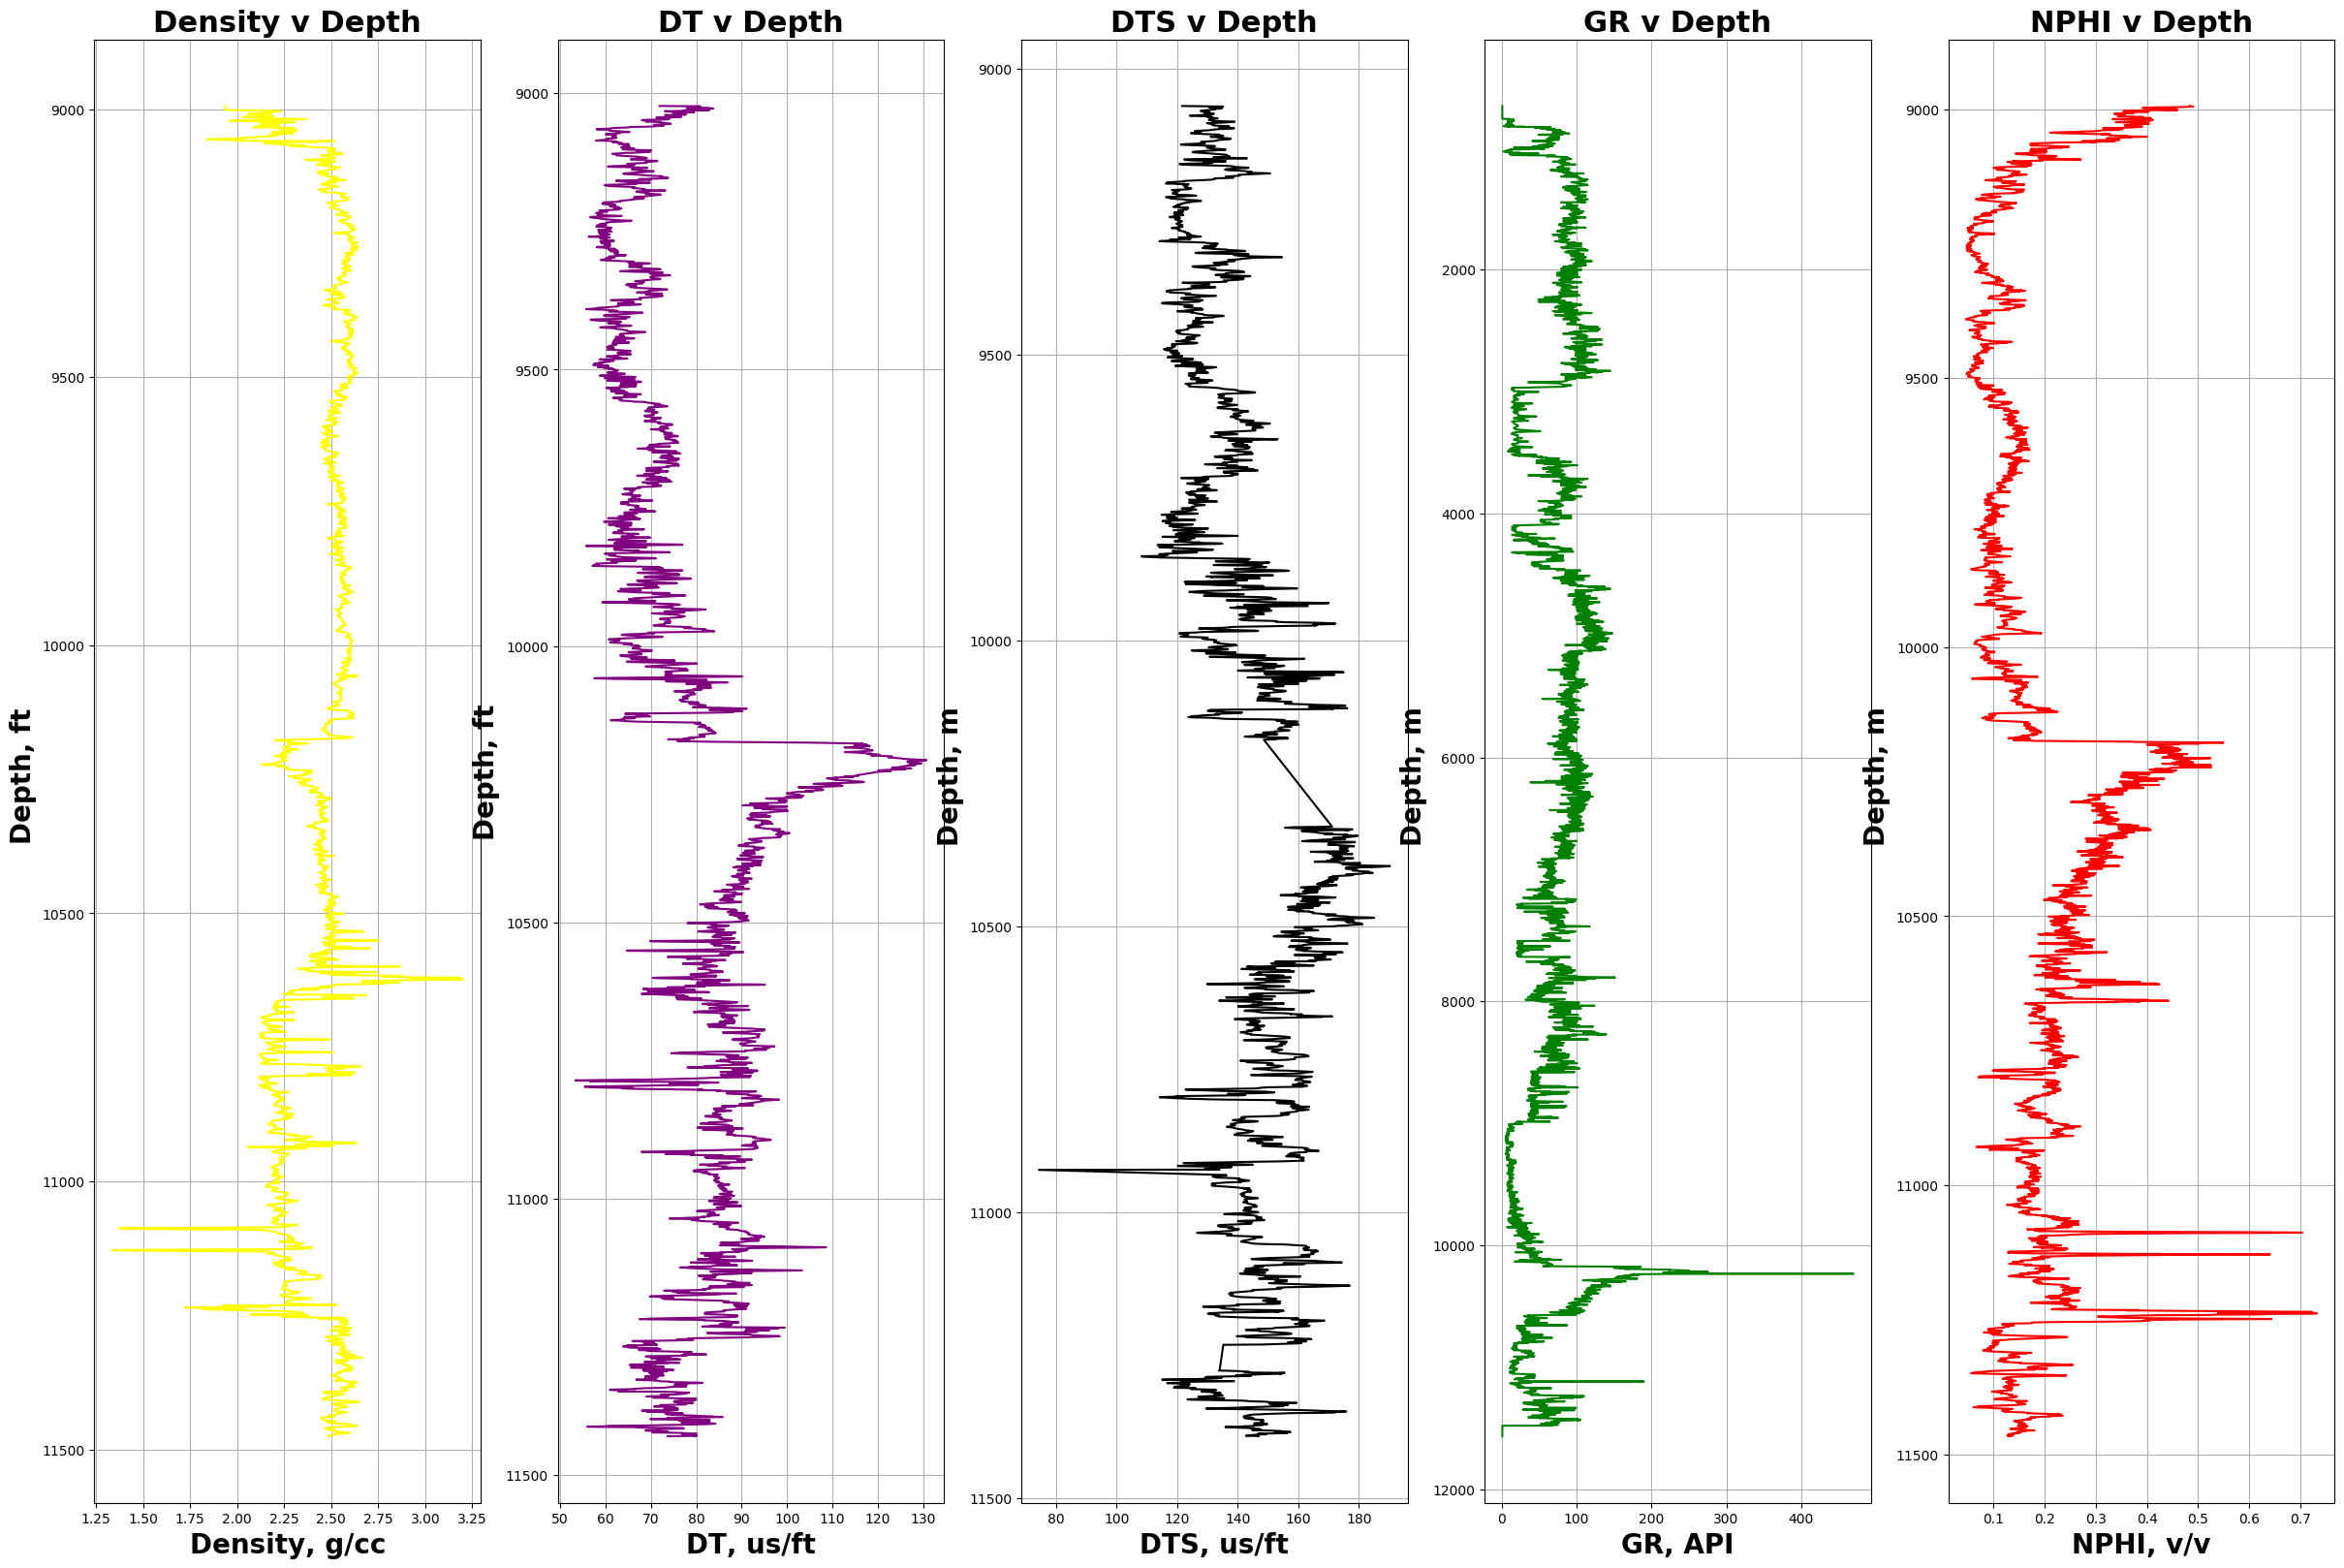

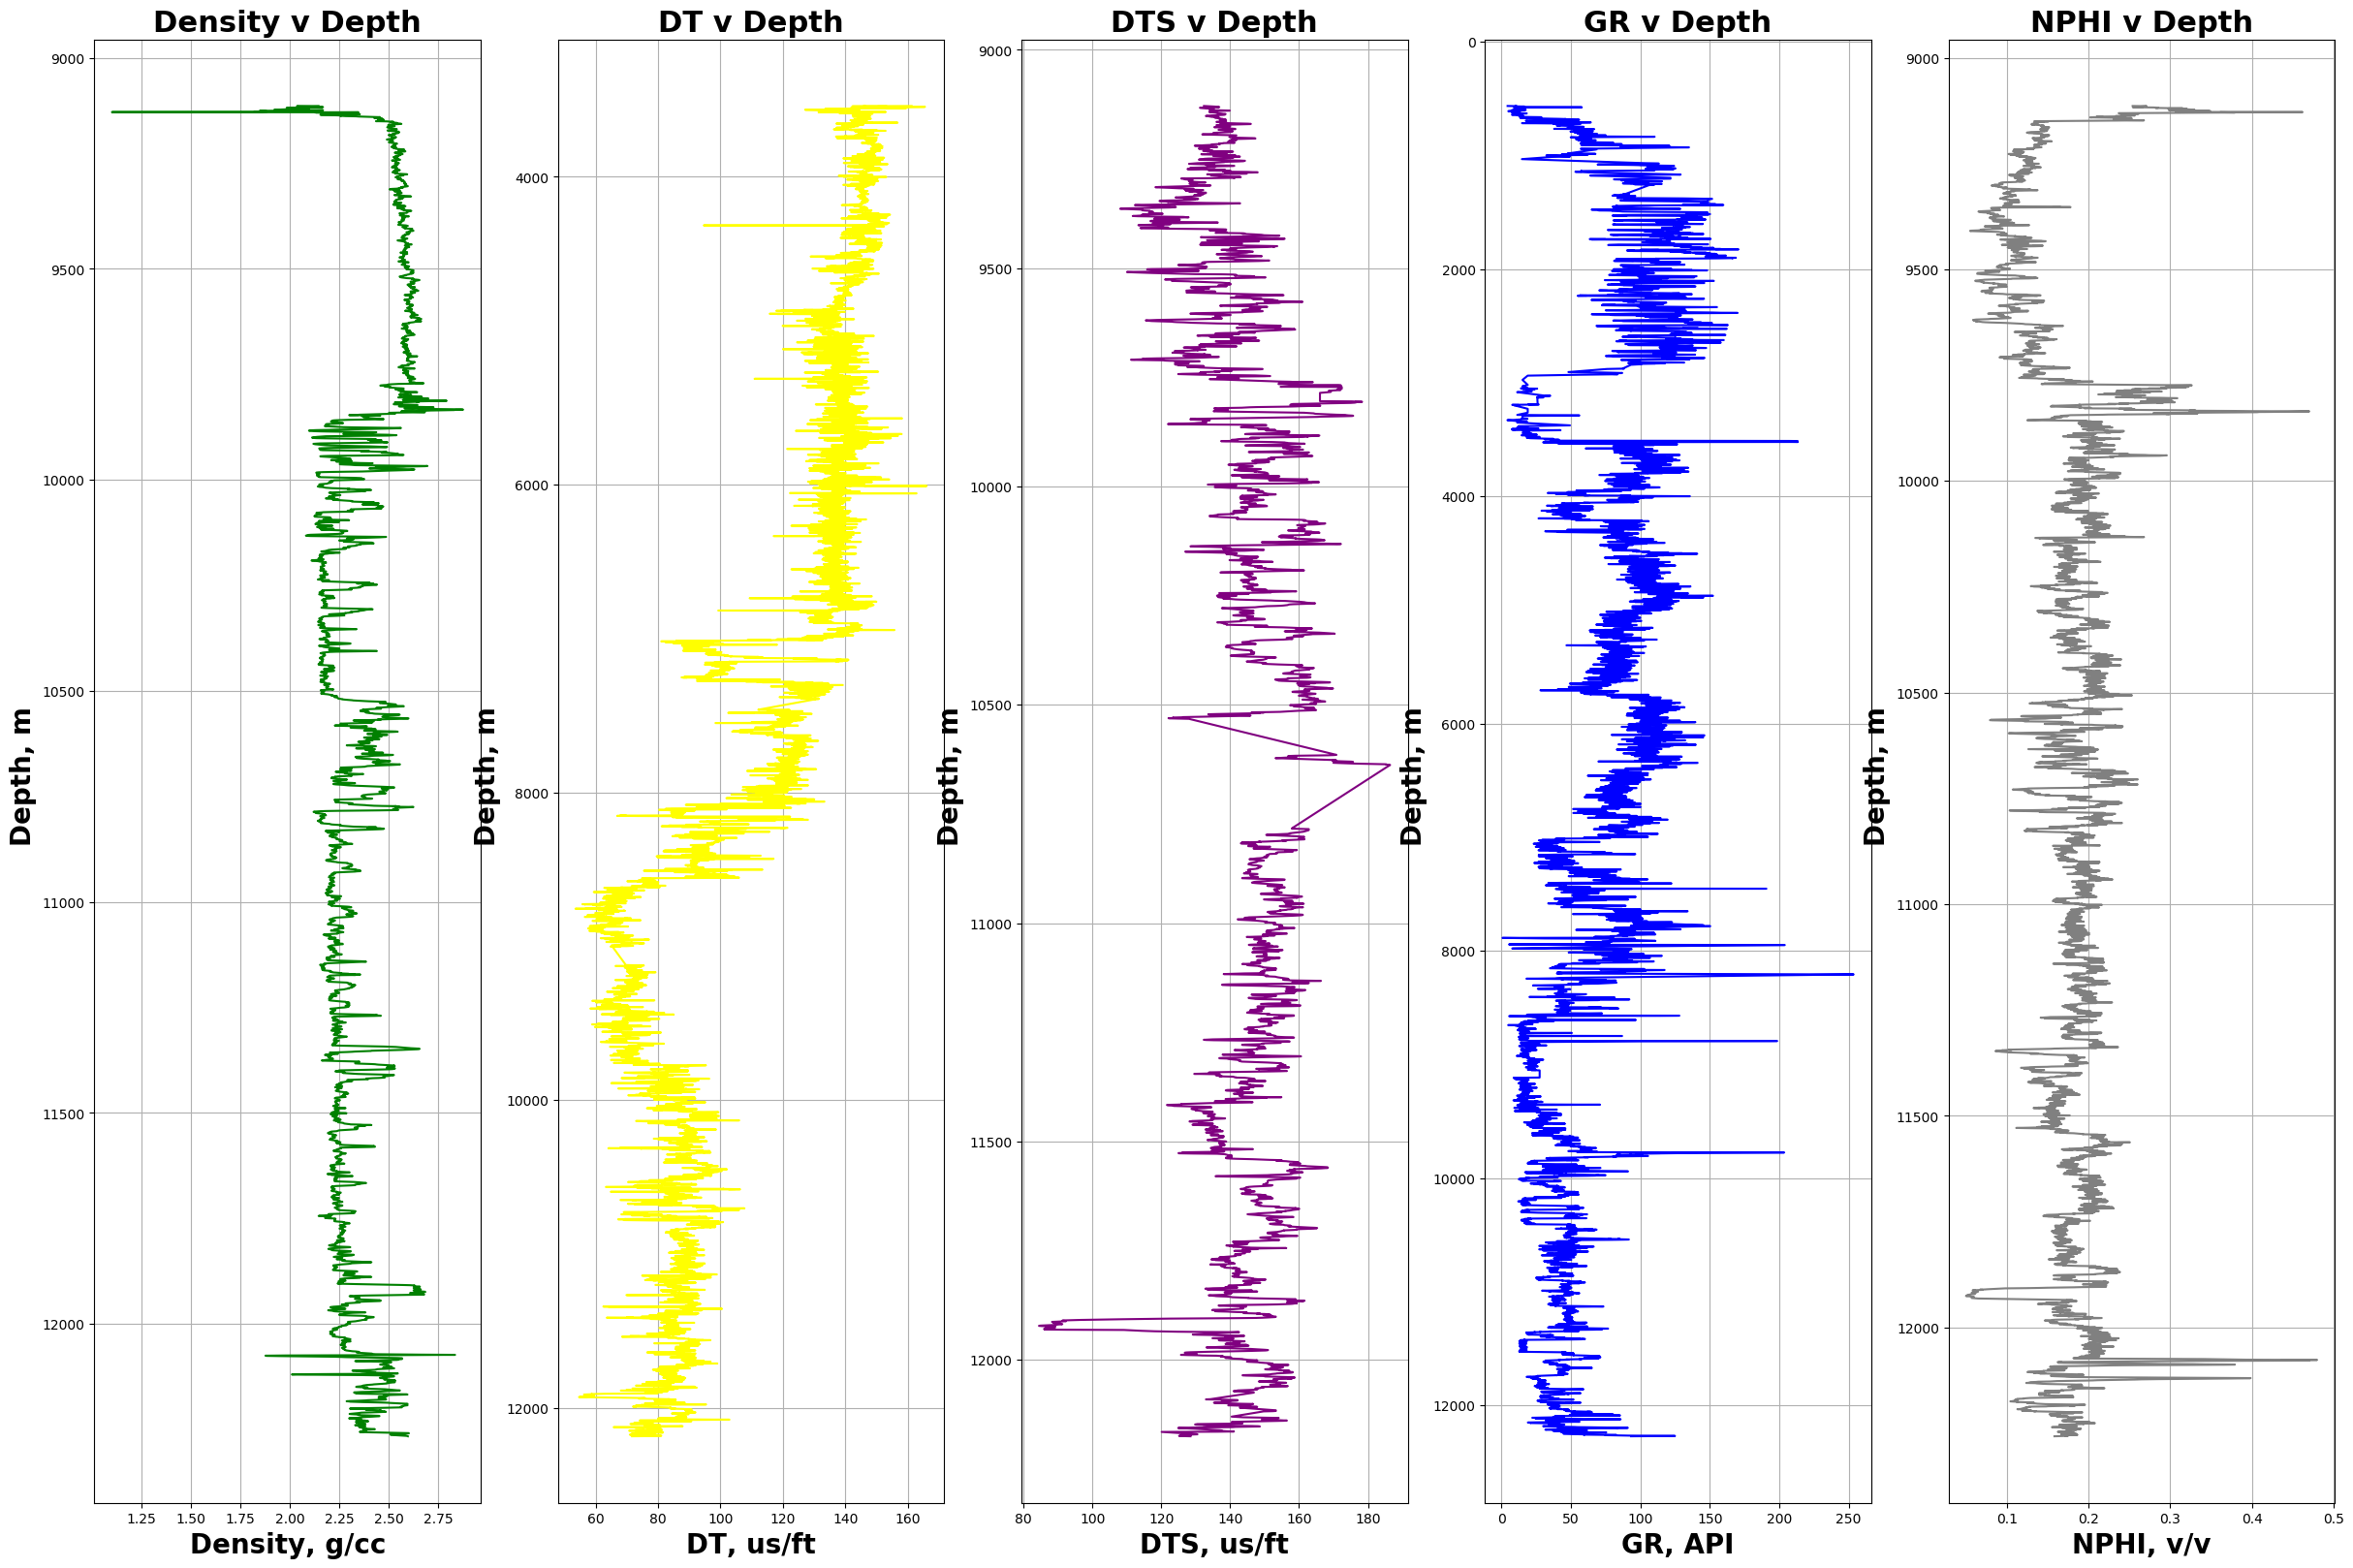

In [9]:
dataA = np.loadtxt("volve_logs/volve_logs/15_9-F-1B_INPUT.LAS", skiprows = 69)
DZA, rhoA = dataA[:,0], dataA[:,16]
DZA = DZA[np.where(rhoA>0)]
rhoA = rhoA[np.where(rhoA>0)]
titleFontSize=22
fontSize=20
fig=plt.figure(figsize=(36,20),dpi=100)
fig.tight_layout(pad=1, w_pad=4, h_pad=2)
plt.subplot(1,6,1)
plt.grid(axis='both')
plt.plot(rhoA,DZA, color='green')
plt.title('Density v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('Density, g/cc', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()
DZA, DT1 =dataA[:, 0], dataA[:,8]
DZA=DZA[np.where(DT1>0)]
DT1=DT1[np.where(DT1>0)]
plt.subplot(1,6,2)
plt.grid(axis='both')
plt.plot(DT1,DZA, color='blue')
plt.title('DT v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DT, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZA, DTS1 =dataA[:, 0], dataA[:,9]
DZA=DZA[np.where(DTS1>0)]
DTS1=DTS1[np.where(DTS1>0)]

plt.subplot(1,6,3)
plt.grid(axis='both')
plt.plot(DTS1,DZA, color='red')
plt.title('DTS v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DTS, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZA, GR1 =dataA[:, 0], dataA[:,10]
DZA=DZA[np.where(GR1>0)]
GR1=GR1[np.where(GR1>0)]

plt.subplot(1,6,4)
plt.grid(axis='both')
plt.plot(GR1,DZA, color='blue')
plt.title('GR v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('GR, API', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZA, NPHI1 =dataA[:, 0], dataA[:,12]
DZA=DZA[np.where(NPHI1>0)]
NPHI1=NPHI1[np.where(NPHI1>0)]

plt.subplot(1,6,5)
plt.grid(axis='both')
plt.plot(NPHI1,DZA, color='green')
plt.title('NPHI v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('NPHI, v/v', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZA, CALI1 =dataA[:, 0], dataA[:,6]
DZA=DZA[np.where(CALI1>0)]
CALI1=CALI1[np.where(CALI1>0)]

plt.subplot(1,6,6)
plt.grid(axis='both')
plt.plot(CALI1,DZA, color='cyan')
plt.title('Caliper v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('Caliper, inch', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()



data2=np.loadtxt("volve_logs/volve_logs/15_9-F-4_INPUT.LAS", skiprows=65)
DZA, rhoA= data2[:,0], data2[:,7]
DZA= DZA[np.where(rhoA>0)]
rhoA= rhoA[np.where(rhoA>0)]

titleFontSize=22
fontSize=20

fig=plt.figure(figsize=(36,20),dpi=100)
fig.tight_layout(pad=1, w_pad=4, h_pad=2)

plt.subplot(1,6,1)
plt.grid(axis='both')
plt.plot(rhoA,DZA, color='yellow')
plt.title('Density v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('Density, g/cc', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, ft ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZA, DT1 =data2[:,0], data2[:,2]
DZA=DZA[np.where(DT1>0)]
DT1=DT1[np.where(DT1>0)]

plt.subplot(1,6,2)
plt.grid(axis='both')
plt.plot(DT1,DZA, color='purple')
plt.title('DT v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DT, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, ft', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZA, DTS1 =data2[:, 0], data2[:,3]
DZA=DZA[np.where(DTS1>0)]
DTS1=DTS1[np.where(DTS1>0)]

plt.subplot(1,6,3)
plt.grid(axis='both')
plt.plot(DTS1,DZA, color='black')
plt.title('DTS v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DTS, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZA, GR1 =data2[:, 0], data2[:,4]
DZA=DZA[np.where(GR1>0)]
GR1=GR1[np.where(GR1>0)]

plt.subplot(1,6,4)
plt.grid(axis='both')
plt.plot(GR1,DZA, color='green')
plt.title('GR v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('GR, API', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZA, NPHI1 =data2[:, 0], data2[:,5]
DZA=DZA[np.where(NPHI1>0)]
NPHI1=NPHI1[np.where(NPHI1>0)]

plt.subplot(1,6,5)
plt.grid(axis='both')
plt.plot(NPHI1,DZA, color='red')
plt.title('NPHI v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('NPHI, v/v', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()


data3 = np.loadtxt("volve_logs/volve_logs/15_9-F-14_INPUT.LAS", skiprows = 69)
DZA, rhoA = data3[:,0], data3[:,9]
DZA = DZA[np.where(rhoA>0)]
rhoA = rhoA[np.where(rhoA>0)]

titleFontSize=22
fontSize=20

fig=plt.figure(figsize=(36,20),dpi=100)
fig.tight_layout(pad=1, w_pad=4, h_pad=2)

plt.subplot(1,6,1)
plt.grid(axis='both')
plt.plot(rhoA,DZA, color='green')
plt.title('Density v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('Density, g/cc', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZA, DT1 =data3[:, 0], data3[:,3]
DZA=DZA[np.where(DT1>0)]
DT1=DT1[np.where(DT1>0)]

plt.subplot(1,6,2)
plt.grid(axis='both')
plt.plot(DT1,DZA, color='yellow')
plt.title('DT v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DT, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZA, DTS1 =data3[:, 0], data3[:,4]
DZA=DZA[np.where(DTS1>0)]
DTS1=DTS1[np.where(DTS1>0)]

plt.subplot(1,6,3)
plt.grid(axis='both')
plt.plot(DTS1,DZA, color='purple')
plt.title('DTS v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DTS, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZA, GR1 =data3[:, 0], data3[:,5]
DZA=DZA[np.where(GR1>0)]
GR1=GR1[np.where(GR1>0)]

plt.subplot(1,6,4)
plt.grid(axis='both')
plt.plot(GR1,DZA, color='blue')
plt.title('GR v Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('GR, API', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZA,NPHI1=data3[:, 0], data3[:,6]
DZA=DZA[np.where(NPHI1>0)]
NPHI1=NPHI1[np.where(NPHI1>0)]

plt.subplot(1,6,5)
plt.grid(axis='both')
plt.plot(NPHI1,DZA, color='grey')
plt.title('NPHI v Depth',fontsize=titleFontSize, fontweight='bold')
plt.xlabel('NPHI, v/v',fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m ',fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()